# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [4]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [5]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
# YOUR CODE HERE!
to_data_sum = to_data.groupby('year').sum()
to_data_sum

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  average_house_value  shelter_costs_owned  \
year                                                          
2001         3040             40583604               118563   
2006         1335             59368353               184352   
2011         2165             74259461               202750   
2016         2845             92969566               246584   

      shelter_costs_rented  
year                        
2001                152031  
2006                129558  
2011                142771  
2016                175885

In [6]:
# Save the dataframe as a csv file
to_data_sum.to_csv("Data/Dwelling_types.csv")

In [7]:
# Transposing dataframe to facilitate plotting charts based on each year
to_data_t = to_data_sum.transpose()

#Dropping last three rows to prepare dataframe required for charts 
to_data_t.drop(['average_house_value','shelter_costs_owned','shelter_costs_rented'],inplace=True)

In [8]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    data.plot.bar(title=title, color=color)
    plt.title(title,fontweight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

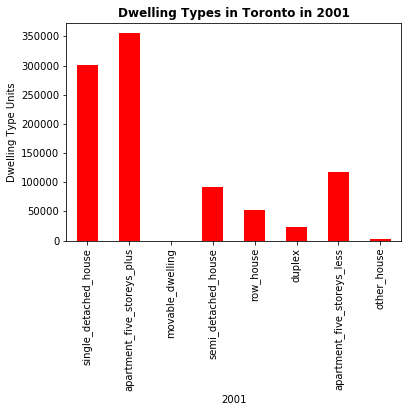

In [9]:
# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2001
# YOUR CODE HERE!
bar_chart_2001=create_bar_chart(to_data_t[2001],"Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

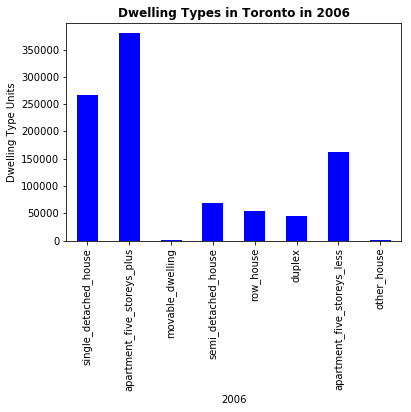

In [10]:
# Bar chart for 2006
# YOUR CODE HERE!
bar_chart_2006=create_bar_chart(to_data_t[2006], 'Dwelling Types in Toronto in 2006', '2006', 'Dwelling Type Units', 'blue')

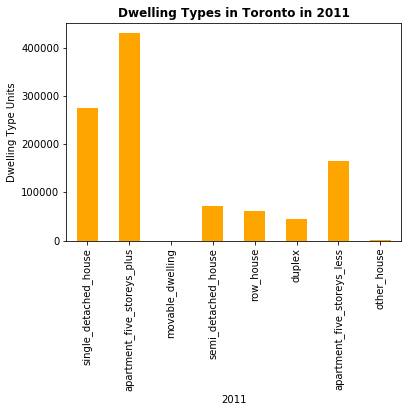

In [11]:
# Bar chart for 2011
# YOUR CODE HERE!
bar_chart_2011=create_bar_chart(to_data_t[2011], 'Dwelling Types in Toronto in 2011', '2011', 'Dwelling Type Units', 'orange')

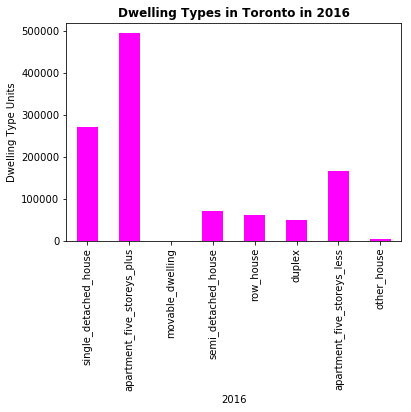

In [12]:
# Bar chart for 2016
# YOUR CODE HERE!
bar_chart_2016=create_bar_chart(to_data_t[2016], 'Dwelling Types in Toronto in 2016', '2016', 'Dwelling Type Units', 'magenta')

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [13]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!
to_data_mean = to_data.groupby('year').mean() 
to_data_mean.loc[:, 'shelter_costs_owned':'shelter_costs_rented'] #Dropping all columns except the required 2 columns

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [14]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    data.plot.line(title=title, color=color)
    plt.title(title,fontweight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

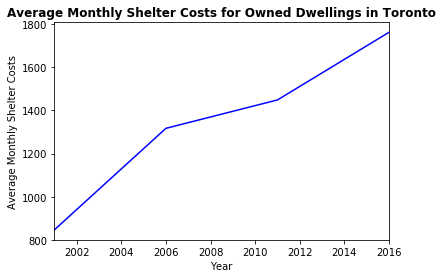

In [15]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year
# Line chart for owned dwellings
# YOUR CODE HERE!
line_chart_sc_owned = create_line_chart(to_data_mean['shelter_costs_owned'],'Average Monthly Shelter Costs for Owned Dwellings in Toronto','Year','Average Monthly Shelter Costs', 'blue')

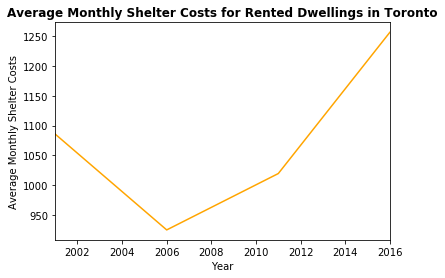

In [16]:
# Line chart for rented dwellings
# YOUR CODE HERE!
line_chart_sc_rented = create_line_chart(to_data_mean['shelter_costs_rented'],'Average Monthly Shelter Costs for Rented Dwellings in Toronto','Year','Average Monthly Shelter Costs', 'orange')

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [17]:
# Calculate the average house value per year
# YOUR CODE HERE!
avg_house_value = to_data_mean.loc[:,'average_house_value']
avg_house_value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

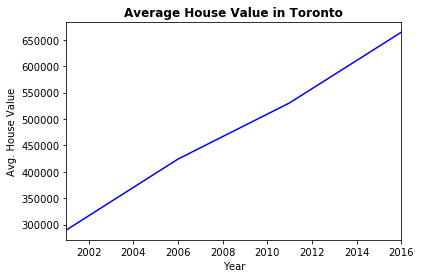

In [18]:
# Plot the average house value per year as a line chart
# YOUR CODE HERE!
line_chart_avg_hv_py = create_line_chart(avg_house_value,'Average House Value in Toronto','Year','Avg. House Value', 'blue')

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [19]:
# Create a new DataFrame with the mean house values by neighbourhood per year
# YOUR CODE HERE!
neighborhood_mean_value = to_data[["neighbourhood","average_house_value"]]
neighborhood_mean_value.head(10)

neighbourhood  average_house_value
year                                                   
2001               Agincourt North               200388
2001  Agincourt South-Malvern West               203047
2001                     Alderwood               259998
2001                         Annex               453850
2001             Banbury-Don Mills               371864
2001                Bathurst Manor               304749
2001           Bay Street Corridor               257404
2001               Bayview Village               327644
2001         Bayview Woods-Steeles               343535
2001          Bedford Park-Nortown               565304

In [20]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!
nmv_plot=neighborhood_mean_value.hvplot.line(groupby='neighbourhood',xlabel="Year",ylabel="Avg. House Value")
nmv_plot

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [21]:
# Fetch the data of all dwelling types per year
# YOUR CODE HERE!
to_data1=to_data.drop(['average_house_value', 'shelter_costs_owned','shelter_costs_rented'], axis=1)
to_data1.head(10)

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   
2001                Bathurst Manor                   2405   
2001           Bay Street Corridor                     10   
2001               Bayview Village                   2170   
2001         Bayview Woods-Steeles                   1650   
2001          Bedford Park-Nortown                   4985   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   
2001                         1550                 0                  130   
2001                         7575                 0                    0   
2001                          630                 0                  170   
2001                         1715                 0                  925   
2001                         2080                 0                   45   

      row_house  duplex  apartment_five_storeys_less  other_house  
year                                                               
2001       1295     195                          185            5  
2001        455     105                          425            0  
2001         50     185                          370            0  
2001        605     275                         3710          165  
2001        380      15                         1360            0  
2001        130     375                          745            0  
2001         15       0                          240            0  
2001        765      15                          640            0  
2001        105      10                          170            5  
2001         40     210                         1235           15

In [22]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!
ndt_plot=to_data1.hvplot.bar(groupby='neighbourhood',xlabel="Year",ylabel="Dwelling Type Units",rot=90,frame_height=200,frame_width=600)
ndt_plot

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [23]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
# Preparing dataframe to group by Neighbourhoods
to_data2=to_data.reset_index(drop=True)

In [24]:
#Fetching data of the top 10 expensive neighbourhoods based on average_house_values
groupby_mean = to_data2.groupby('neighbourhood').mean()
top10=groupby_mean.nlargest(10,'average_house_value')
top10

single_detached_house  \
neighbourhood                                              
Bridle Path-Sunnybrook-York Mills                2260.00   
Forest Hill South                                1742.50   
Lawrence Park South                              3472.50   
Rosedale-Moore Park                              2498.75   
St.Andrew-Windfields                             3225.00   
Casa Loma                                         916.25   
Bedford Park-Nortown                             4865.00   
Forest Hill North                                1488.75   
Kingsway South                                   2326.25   
Yonge-St.Clair                                    565.00   

                                   apartment_five_storeys_plus  \
neighbourhood                                                    
Bridle Path-Sunnybrook-York Mills                       331.25   
Forest Hill South                                      2031.25   
Lawrence Park South                                     773.75   
Rosedale-Moore Park                                    4641.25   
St.Andrew-Windfields                                   1670.00   
Casa Loma                                              2310.00   
Bedford Park-Nortown                                   1981.25   
Forest Hill North                                      3392.50   
Kingsway South                                          576.25   
Yonge-St.Clair                                         3948.75   

                                   movable_dwelling  semi_detached_house  \
neighbourhood                                                              
Bridle Path-Sunnybrook-York Mills              0.00                36.25   
Forest Hill South                              1.25                61.25   
Lawrence Park South                            0.00               126.25   
Rosedale-Moore Park                            0.00               486.25   
St.Andrew-Windfields                           0.00               185.00   
Casa Loma                                      0.00               288.75   
Bedford Park-Nortown                           0.00                43.75   
Forest Hill North                              0.00                12.50   
Kingsway South                                 0.00                66.25   
Yonge-St.Clair                                 0.00               425.00   

                                   row_house  duplex  \
neighbourhood                                          
Bridle Path-Sunnybrook-York Mills      90.00    25.0   
Forest Hill South                      45.00    75.0   
Lawrence Park South                    38.75   225.0   
Rosedale-Moore Park                   245.00   327.5   
St.Andrew-Windfields                  552.50    97.5   
Casa Loma                             201.25   162.5   
Bedford Park-Nortown                   57.50   287.5   
Forest Hill North                      16.25    82.5   
Kingsway South                         48.75    20.0   
Yonge-St.Clair                        212.50   172.5   

                                   apartment_five_storeys_less  other_house  \
neighbourhood                                                                 
Bridle Path-Sunnybrook-York Mills                        40.00         0.00   
Forest Hill South                                      1027.50         3.75   
Lawrence Park South                                     966.25        16.25   
Rosedale-Moore Park                                    1618.75         2.50   
St.Andrew-Windfields                                    586.25         5.00   
Casa Loma                                              1192.50         2.50   
Bedford Park-Nortown                                   1275.00        88.75   
Forest Hill North                                       402.50         1.25   
Kingsway South                                          336.25         2.50   
Yonge-St.Clair                                         1308.75    

In [25]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
top_exp_neighbourhoods = top10.hvplot.bar(title="Top 10 Expensive Neighbourhoods in Toronto", x='neighbourhood',y='average_house_value', xlabel='Neighbourhood', ylabel="Avg. House Value",rot=90,frame_height=200,frame_width=600)
top_exp_neighbourhoods

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [26]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [27]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
groupby_mean.reset_index(inplace=True)
groupby_mean.head()

neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

In [28]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!
neighborhood_combi=pd.concat([df_neighbourhood_locations, groupby_mean],axis=1,join='inner')
neighborhood_combi.head()

neighbourhood        lat        lon  \
0               Agincourt North  43.805441 -79.266712   
1  Agincourt South-Malvern West  43.788658 -79.265612   
2                     Alderwood  43.604937 -79.541611   
3                         Annex  43.671585 -79.404001   
4             Banbury-Don Mills  43.737657 -79.349718   

                  neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

In [29]:
#Dropping duplicate 'neighbourhood' column
neighborhood_combi.columns.values[3] = 'N'
neighborhood_combi.drop(columns=['N'],axis=1,inplace=True)
neighborhood_combi.head()

neighbourhood        lat        lon  single_detached_house  \
0               Agincourt North  43.805441 -79.266712                3435.00   
1  Agincourt South-Malvern West  43.788658 -79.265612                2897.50   
2                     Alderwood  43.604937 -79.541611                2903.75   
3                         Annex  43.671585 -79.404001                 751.25   
4             Banbury-Don Mills  43.737657 -79.349718                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

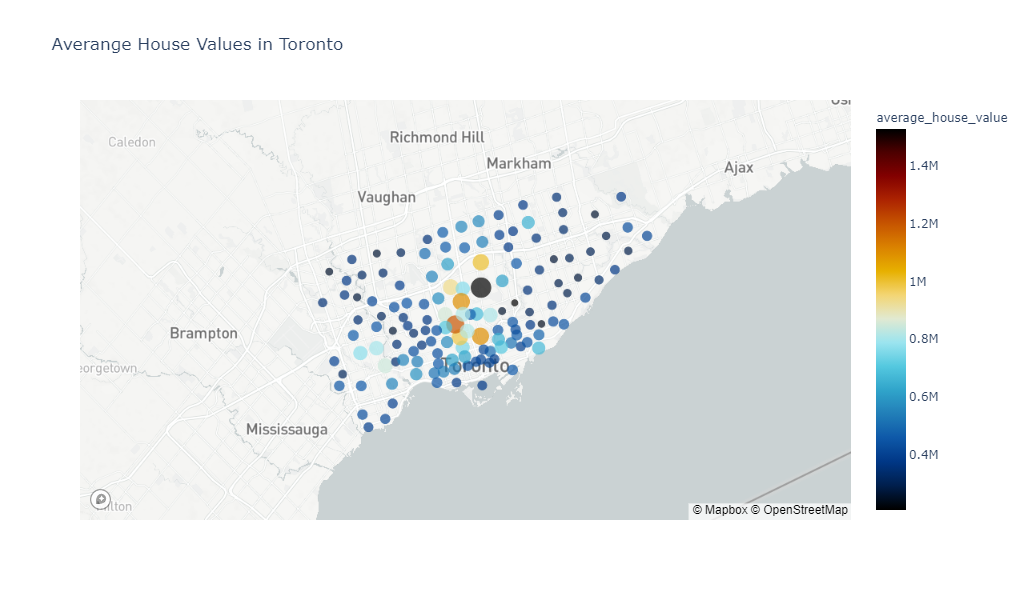

In [30]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!
px.set_mapbox_access_token(map_box_api)
toronto_map = px.scatter_mapbox(
    neighborhood_combi,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    color_continuous_scale=px.colors.cyclical.IceFire,
    hover_name="neighbourhood",
    title="Averange House Values in Toronto",
    size_max=15, zoom=9,
    width=1000, height=600
)
toronto_map.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [31]:
#Resetting index from original dataframe to facilitate plotting snapshot
to_data.reset_index(inplace=True)

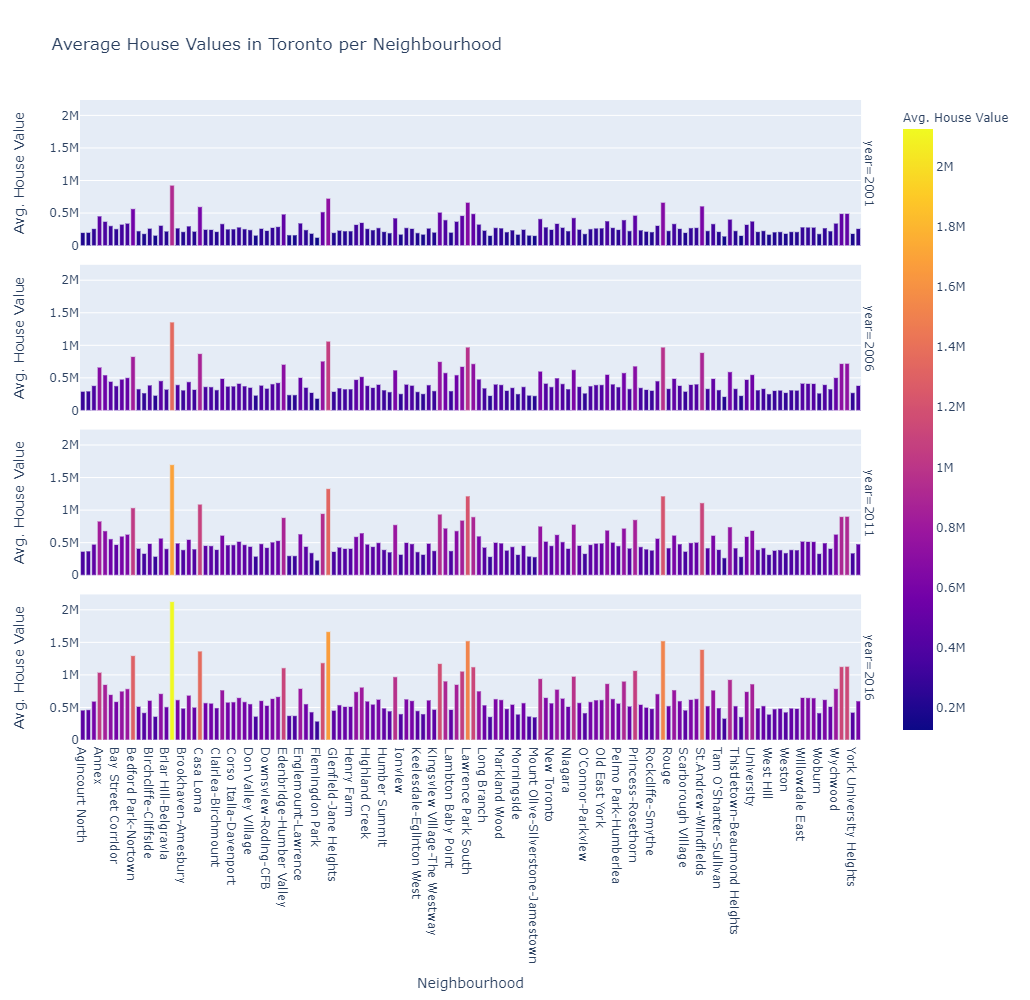

In [32]:
# YOUR CODE HERE!
# Using plotly express to plot row facet
avg_hv_py = px.bar(to_data, x="neighbourhood", y="average_house_value", labels={"average_house_value":"Avg. House Value", "neighbourhood":"Neighbourhood"}, color="average_house_value", barmode="group", facet_row="year", height=1000, title="Average House Values in Toronto per Neighbourhood")
avg_hv_py.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [33]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!
to_data3=to_data.groupby('year').apply(lambda x: x.nlargest(10, 'shelter_costs_owned')).reset_index(drop=True)
to_data3.head()

year                      neighbourhood  single_detached_house  \
0  2001  Bridle Path-Sunnybrook-York Mills                   2275   
1  2001                     Kingsway South                   2370   
2  2001                          Casa Loma                   1035   
3  2001                Rosedale-Moore Park                   2610   
4  2001                Bay Street Corridor                     10   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                          110                 0                   25   
1                          260                 0                   65   
2                         1700                 0                  415   
3                         3880                 0                  520   
4                         7575                 0                    0   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0         15      10                           20            0   
1         45       0                          340           10   
2        190     185                         1090            5   
3        225     290                         1735            0   
4         15       0                          240            0   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0               927466                 1983                  1790  
1               512334                 1362                  1340  
2               596077                 1241                  1500  
3               664476                 1219                  1540  
4               257404                 1218                  1142

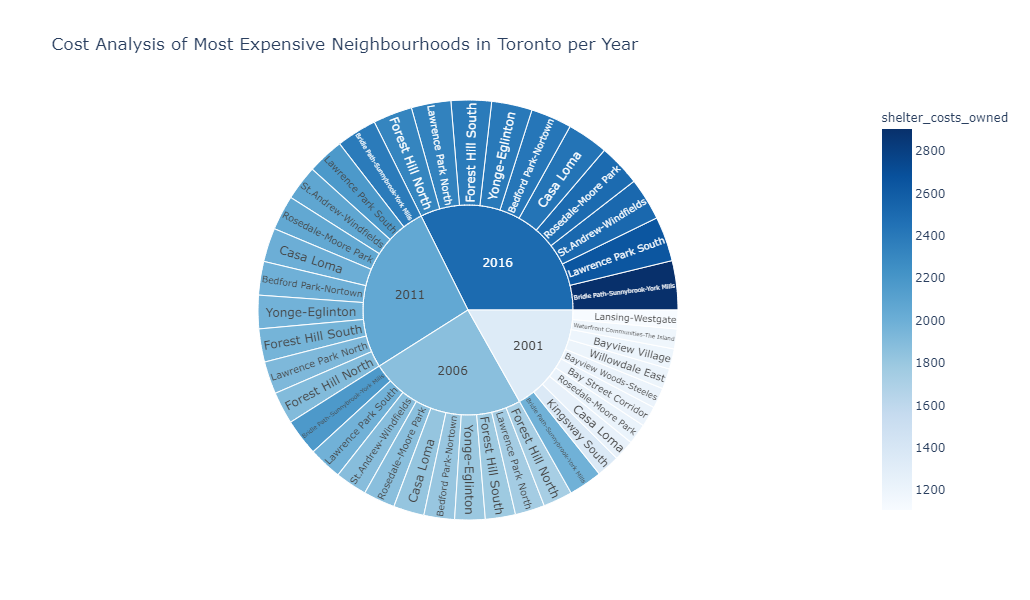

In [34]:
# Create the sunburst chart
# YOUR CODE HERE!
cost_sunburst = px.sunburst(to_data3, path=['year', 'neighbourhood'], values='shelter_costs_owned',
                  color='shelter_costs_owned', hover_data=['shelter_costs_owned'],
                  color_continuous_scale='Blues', 
                  title = 'Cost Analysis of Most Expensive Neighbourhoods in Toronto per Year',
                 height=600)
cost_sunburst.show()